# Tutorial de especificação de histograma, caso discreto exato

O problema consiste em mapear os pixels de uma imagem dada para que o histograma da
imagem transformada seja um histograma especificado. Este é um problema que acontece,
por exemplo, quando você vai fazer um mosaico e possui um conjunto definido de
pastilhas de tons de cinza disponível no seu estoque. Como mapear os pixels de sua imagem
para utilizar as pastilhas disponíveis.

A solução adotada aqui consiste na seguinte idéia: primeiro é importante que a quantidade
de pixels com todos os tons possíveis sejam exatamente a mesma dos pixels da imagem
de entrada. O próximo passo consiste em ordenar os dois conjuntos e fazer a correspondência
entre eles, isto é, o n-ésimo pixel ordenado do seu "estoque" vai substituir o n-ésimo pixel
ordenado de sua imagem.

Assim, existem 3 etapas: 

1) dada a especificação do histograma, modificar este histograma
   para que represente o mesmo número de pixels da imagem original; 
   
2) dado o histograma desejado, criar o conjunto de pixels ordenados a partir do histograma 
   desejado; 
   
3) calcular o índice de ordenação dos pixels da imagem de entrada e substituir neste local 
   o pixel do histograma desejado.    

## Especificando o histograma desejado

Suponha que queremos que o histograma tenha uma distribuição triangular. Estamos 
considerando que os pixels variam de 0 a 255, assim o histograma é um vetor de 256
elementos:

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import sys,os
ia898path = os.path.abspath('/etc/jupyterhub/ia898_1s2017/')
if ia898path not in sys.path:
    sys.path.append(ia898path)
import ia898.src as ia

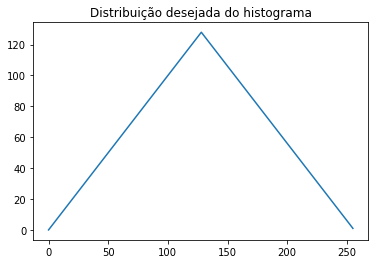

In [2]:
hout = np.concatenate((np.arange(128),np.arange(128,0,-1)))
plt.plot(hout),plt.title('Distribuição desejada do histograma');

## Passo 1:

Modificar o histograma para que represente o mesmo número de pixels da
imagem desejada. A imagem a ser modificada é a "cameraman.tif". A idéia é calcular
o histograma acumulado, normalizá-lo para que o valor final acumulado seja o número
de pixels (n) da imagem de entrada e fazer a diferença discreta para calcular o
histograma que represente o mesmo número de pixels da imagem do "cameraman".

""
imagem de entrada

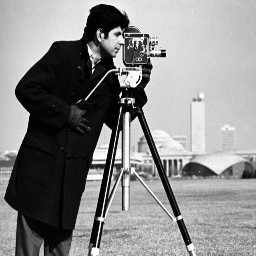

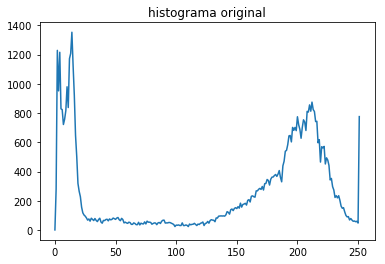

In [3]:
f = mpimg.imread('../data/cameraman.tif')
ia.adshow(f, 'imagem de entrada')
plt.plot(ia.histogram(f)),plt.title('histograma original');

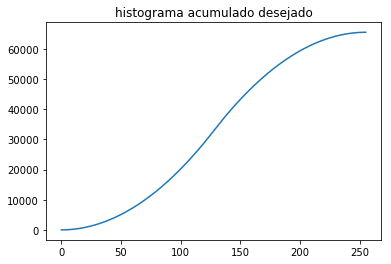

<function matplotlib.pyplot.show>

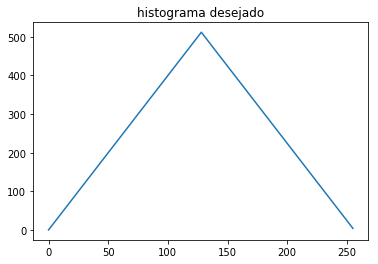

In [4]:
n = f.size
hcc = np.cumsum(hout)
hcc1 = ia.normalize(hcc,[0,n])
h1 = np.diff(np.concatenate(([0],hcc1)))

plt.plot(hcc1), plt.title('histograma acumulado desejado');
plt.show()
plt.plot(h1), plt.title('histograma desejado');
plt.show

## Passo 2:

Realizar o conjunto de pixels desejados a partir do histograma desejado. É utilizado
a função "repeat" do NumPy.

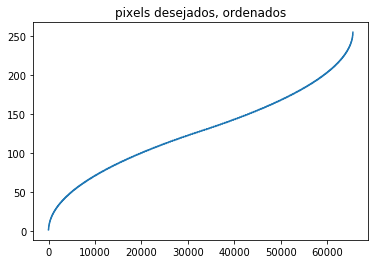

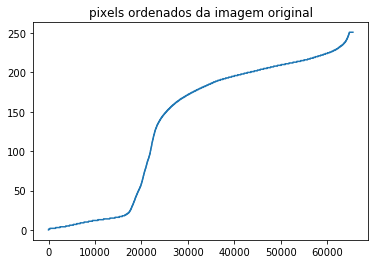

In [5]:
gs = np.repeat(np.arange(256),h1).astype('uint8')
plt.plot(gs), plt.title('pixels desejados, ordenados');
plt.show()
plt.plot(np.sort(f.ravel())), plt.title('pixels ordenados da imagem original');

## Passo 3:

Fazer o mapeando dos pixels ordenados. Aqui existem três técnicas importantes:

- a primeira é trabalhar com a imagem rasterizada em uma dimensão, com o uso de ``ravel()``; 
- a segunda é o uso da função ``argsort`` que retorna os índices dos pixels ordenados 
  pelo nível de cinza;
- e a terceira é a atribuição indexada ``g[si] = gs``, onde ``g`` é a imagem de saída 
  rasterizada, ``si`` é o array de índices dos pixels ordenados e ``gs`` são os pixels 
  desejados ordenados. 
- O último passo é colocar o shape da imagem desejada. 

""
imagem modificada

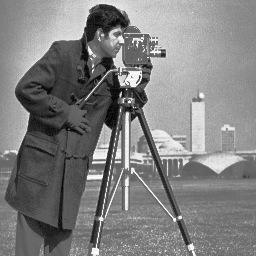

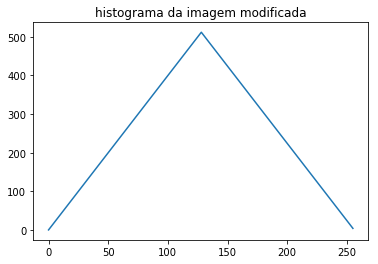

In [6]:
g = np.empty( (n,), np.uint8)
si = np.argsort(f.ravel())

g[si] = gs
g.shape = f.shape

ia.adshow(g, 'imagem modificada')
h = ia.histogram(g)
plt.plot(h), plt.title('histograma da imagem modificada');

## Referências

- [Numpy:repeat](https://docs.scipy.org/doc/numpy/reference/generated/numpy.repeat.html)